Regression Equation:
MPG = 61.08 + (-5.50)*Engine Size + (-0.0204)*Weight + (0.0545)*Horsepower

Coefficients and p-values:
Intercept     = 61.0782, t = 25.7472, p = 0.0000
Engine Size   = -5.4978, t = -2.0781, p = 0.0542
Weight        = -0.0204, t = -5.8869, p = 0.0000
Horsepower    = 0.0545, t = 0.9351, p = 0.3637

R-squared: 0.9904


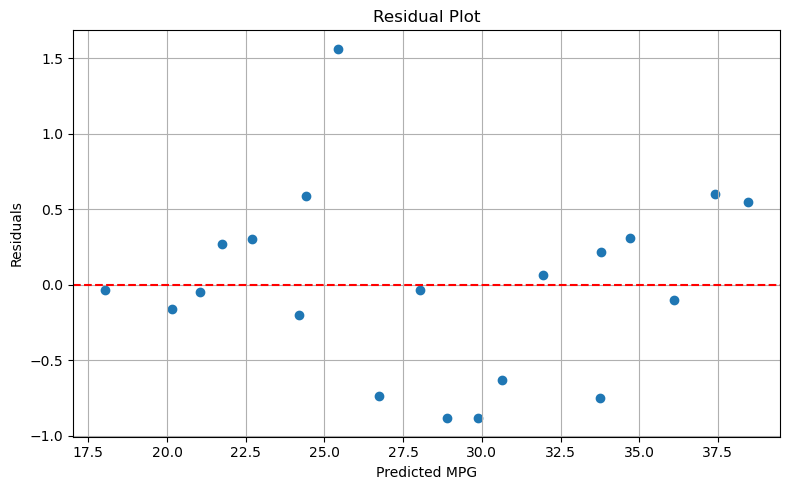

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

# Data input
data = {
    'Engine Size': [1.6, 2.0, 2.4, 1.8, 2.2, 3.0, 2.0, 1.5, 2.5, 3.2, 1.4, 2.1, 3.5, 1.6, 2.3, 2.8, 2.6, 1.3, 3.1, 1.7],
    'Weight': [1200, 1300, 1500, 1250, 1400, 1600, 1350, 1100, 1550, 1650, 1050, 1380, 1700, 1150, 1450, 1580, 1520, 1020, 1620, 1180],
    'Horsepower': [110, 130, 150, 115, 140, 180, 135, 105, 160, 190, 100, 138, 200, 108, 145, 170, 155, 98, 185, 112],
    'MPG': [34, 30, 27, 32, 28, 22, 29, 36, 25, 20, 38, 28, 18, 35, 26, 23, 24, 39, 21, 33]
}
df = pd.DataFrame(data)


X = df[['Engine Size', 'Weight', 'Horsepower']]
y = df['MPG']

model = LinearRegression().fit(X, y)


y_pred = model.predict(X)
residuals = y - y_pred

# R-squared
r_squared = r2_score(y, y_pred)

# Coefficients and intercept
intercept = model.intercept_
coefficients = model.coef_

# Manual hypothesis testing
n = len(y)
p = X.shape[1]
X_with_intercept = np.column_stack((np.ones(n), X))
beta_hat = np.insert(coefficients, 0, intercept)
y_hat = X_with_intercept @ beta_hat
residuals = y - y_hat
MSE = np.sum(residuals**2) / (n - p - 1)
var_beta = MSE * np.linalg.inv(X_with_intercept.T @ X_with_intercept).diagonal()
se_beta = np.sqrt(var_beta)
t_stats = beta_hat / se_beta
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df=n - p - 1)) for t in t_stats]

# Print results
print("Regression Equation:")
print(f"MPG = {intercept:.2f} + ({coefficients[0]:.2f})*Engine Size + ({coefficients[1]:.4f})*Weight + ({coefficients[2]:.4f})*Horsepower")
print("\nCoefficients and p-values:")
print(f"Intercept     = {intercept:.4f}, t = {t_stats[0]:.4f}, p = {p_values[0]:.4f}")
print(f"Engine Size   = {coefficients[0]:.4f}, t = {t_stats[1]:.4f}, p = {p_values[1]:.4f}")
print(f"Weight        = {coefficients[1]:.4f}, t = {t_stats[2]:.4f}, p = {p_values[2]:.4f}")
print(f"Horsepower    = {coefficients[2]:.4f}, t = {t_stats[3]:.4f}, p = {p_values[3]:.4f}")
print(f"\nR-squared: {r_squared:.4f}")

# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted MPG")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()


Son = 30.3171 + 0.3497*Father + 0.2045*Mother
Intercept: β = 30.3171, SE = 10.6693
Father: β = 0.3497, SE = 0.2142
Mother: β = 0.2045, SE = 0.3764

One-sided tests (H0: β < 1, H1: β >= 1):
Father: t = -3.0355, p = 0.9905
Mother: t = -2.1135, p = 0.9638


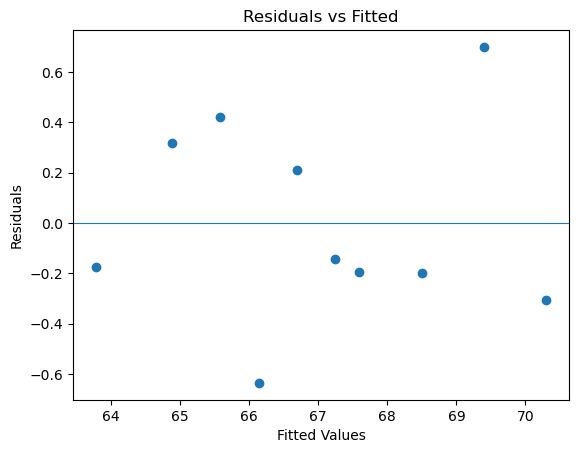

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.DataFrame(data_2)

# Design matrix X and response y
X = np.column_stack((np.ones(len(df)), df[['Father’s Height (in)', 'Mother’s Height (in)']].values))
y = df['Son’s Height (in)'].values

# Normal-equation solution
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Residuals and variance estimate
y_pred = X @ beta
resid = y - y_pred
n, p = X.shape
sigma2 = (resid @ resid) / (n - p)

# Standard errors
cov_beta = sigma2 * np.linalg.inv(X.T @ X)
se = np.sqrt(np.diag(cov_beta))

# Print regression equation and coefficients
print(f"Son = {beta[0]:.4f} + {beta[1]:.4f}*Father + {beta[2]:.4f}*Mother")
for name, b, sb in zip(['Intercept','Father','Mother'], beta, se):
    print(f"{name}: β = {b:.4f}, SE = {sb:.4f}")

# One-sided test H0: β < 1 vs H1: β >= 1
print("\nOne-sided tests (H0: β < 1, H1: β >= 1):")
for idx, name in enumerate(['Father', 'Mother'], start=1):
    t_stat = (beta[idx] - 1) / se[idx]
    p_val = 1 - stats.t.cdf(t_stat, df=n-p)
    print(f"{name}: t = {t_stat:.4f}, p = {p_val:.4f}")

# Residual plot
plt.scatter(y_pred, resid)
plt.axhline(0, linewidth=0.8)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()